Image Filter Classification Model

In [2]:
#importing the required libraries
import os
import numpy as np
import cv2
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D,BatchNormalization,MaxPooling2D,Dropout,Flatten,Dense,Activation
from keras.optimizers import Adam
from keras.regularizers import l2


In [3]:
# Set the path to the directory containing the training and validation data
data_dir = "C://Users//HP//Desktop//FACED"

# Define image dimensions
img_width, img_height = 128, 128

# Set the number of epochs for training
epochs = 25


# Set the batch size for training
batch_size = 128


In [4]:
# Define the training and validation data generators with data augmentation
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    os.path.join(data_dir, 'train'),
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
    os.path.join(data_dir, 'validation'),
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 16800 images belonging to 42 classes.
Found 4200 images belonging to 42 classes.


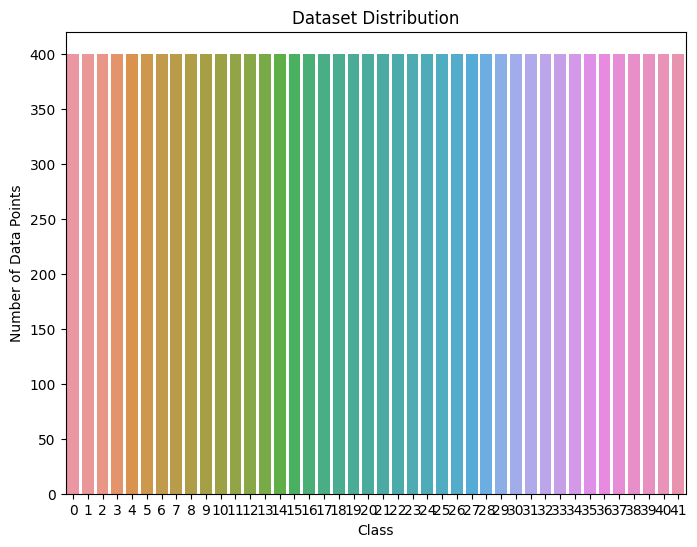

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt


# Get the class names and their counts from the data generator
class_names = train_generator.class_indices
class_counts = train_generator.classes

# Count the number of data points in each class
counts = np.bincount(class_counts)

# Plot the dataset
plt.figure(figsize=(8, 6))
sns.barplot(x=list(class_names.values()), y=counts)
plt.title('Dataset Distribution')
plt.xlabel('Class')
plt.ylabel('Number of Data Points')
plt.show()


In [5]:
# Define the CNN model architecture
model = Sequential()

#1st CNN layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

#3rd CNN layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

#Flatten layer
model.add(Flatten())

#Fully connected layer 1
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

#Fully connected layer 2
model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

#Fully connected layer 3
model.add(Dense(42, activation='softmax'))

In [6]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

In [7]:
# Compile the model
model.compile(loss='categorical_crossentropy', 
              
              optimizer=Adam(lr=0.001), 
              metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, 
                    epochs=epochs, 
                    validation_data=validation_generator,
                    callbacks=callbacks_list
                    )

C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/25
132/132 [==============================] - 2191s 16s/step - loss: 3.4354 - accuracy: 0.2135 - val_loss: 6.3020 - val_accuracy: 0.0333 - lr: 0.0010
Epoch 2/25
132/132 [==============================] - 1598s 12s/step - loss: 2.4212 - accuracy: 0.3796 - val_loss: 5.9313 - val_accuracy: 0.0414 - lr: 0.0010
Epoch 3/25
132/132 [==============================] - 1655s 13s/step - loss: 2.0546 - accuracy: 0.4571 - val_loss: 4.0239 - val_accuracy: 0.1143 - lr: 0.0010
Epoch 4/25
132/132 [==============================] - 1687s 13s/step - loss: 1.8286 - accuracy: 0.5060 - val_loss: 2.3303 - val_accuracy: 0.3848 - lr: 0.0010
Epoch 5/25
132/132 [==============================] - 1696s 13s/step - loss: 1.6702 - accuracy: 0.5375 - val_loss: 1.7603 - val_accuracy: 0.5281 - lr: 0.0010
Epoch 6/25
132/132 [==============================] - 1743s 13s/step - loss: 1.5405 - accuracy: 0.5649 - val_loss: 1.5141 - val_accuracy: 0.5512 - lr: 0.0010
Epoch 7/25
132/132 [==============================] 

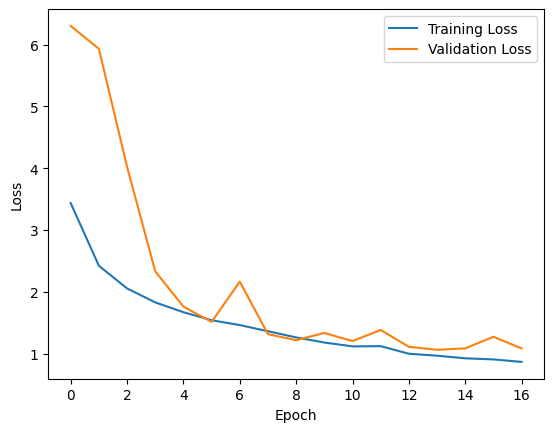

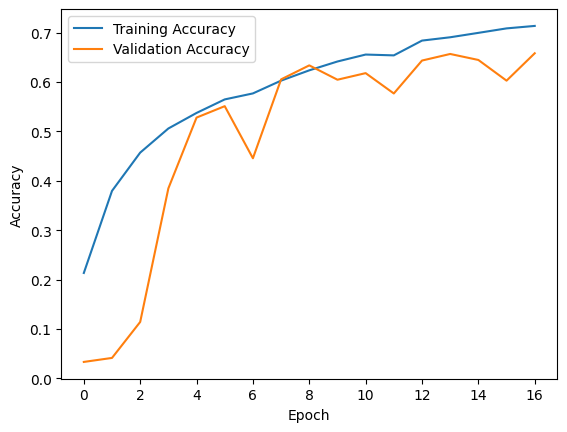

In [8]:
#import libraries for plotting
import matplotlib.pyplot as plt

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
#save the model as a .h5 file
model.save('C:\\Users\\HP\\Documents\\Y4 S1\\research\\models\\filters\\filter_classification_model_e25_bs128_f3.h5')

In [12]:
# Load the image you want to classify using OpenCV
img = cv2.imread(r'C:\Users\HP\Desktop\faced_images below 1000\Moon\7411.jpg')

# Resize the image to the size used for training the model (128x128 pixels)
img = cv2.resize(img, (128, 128))

# Normalize the pixel values to be in the range [0, 1]
img = img / 255.0

# Add a batch dimension to the image so that it has shape (1, 128, 128, 3)
img = np.expand_dims(img, axis=0)

# Pass the image through the model using the model.predict() method
predictions = model.predict(img)

# Find the index of the class with the highest probability using np.argmax()
predicted_class = np.argmax(predictions)

# Print the predicted class
print(predicted_class)

class_indices = validation_generator.class_indices
class_label = list(class_indices.keys())[list(class_indices.values()).index(predicted_class)]
print(class_label)

if class_label == 'Vesper' or 'Ginza' or 'Lark' or 'Aden' or 'Gingham' or 'Ludwig' or 'Skyline' or 'Helena' or 'Dogpatch' or 'Sutro' or 'Perpetua' or 'Juno' or 'Ashby' or 'Slumber' or 'Stinson' or 'Rayes' or 'Willow' or 'Crema' or 'Inkwell':
    print('Depressed')
else:
    print('Not Depressed')

1/1 [==============================] - 0s 101ms/step
24
Moon
Depressed
